--------------------
# TRABAJO PRACTICO 1
--------------------

Alumno: Matias Tripode

## 1a) Implementación del Gradiente Descendente (1 punto)

In [371]:
# importar librerias
import numpy as np
import matplotlib.pyplot as plt

In [372]:
# -----------------------------------
# Funciones a utilizar en GD y ADAM
# -----------------------------------

# Función no lineal
def funcion_no_lineal(W, X, b):
    return np.tanh(W * X + b)

# Función de costo MSE
def compute_cost(y_hat, y):
    return np.mean((y_hat - y) ** 2)

# Cálculo de gradientes
def gradiente(y_hat, data_y, data_x, z):
    dz = (y_hat - data_y) * (1 - np.tanh(z)**2)
    dw = np.mean(dz * data_x)
    db = np.mean(dz)
    return (dz, dw, db)

# Función de activacion
def activacion(z):
    return np.tanh(z)

# Funcion para graficar
def graficarHistorial(plt, cost_history, learning_rate, n_epochs):
    plt.plot(range(n_epochs), cost_history, label=f'lr={learning_rate}')

def mostrarGrafico(plt, nombre_algoritmo):
    plt.title(f"Costo J(w, b) vs Número de épocas ({nombre_algoritmo})")
    plt.xlabel("Épocas")
    plt.ylabel("Costo (MSE)")
    plt.legend()
    plt.grid(True)
    plt.show()

def configurarGrafico(plt):
    plt.figure(figsize=(8, 6))

def graficarAjusteFinal(plt, data_x, data_y, w, b):
    # Visualización del ajuste final
    plt.scatter(data_x, data_y, color='blue', alpha=0.5, label='Datos')
    plt.plot(data_x, funcion_no_lineal(w, data_x, b), color='red', label='Modelo ajustado')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

# Tamańo del data set
data_set_size = 100

# Hiperparámetros
learning_rates = [0.1, 0.01, 0.001]
epochs = 200


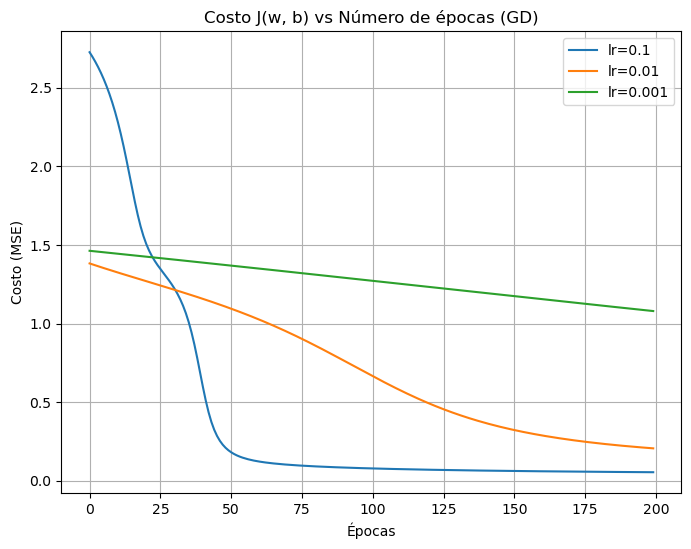

In [373]:
# --------------------
# Generación de datos
# --------------------
data_x = np.linspace(-2, 2, data_set_size).reshape(-1, 1)  # vector aleatorio con 100 valores entre -2 y 2
np.random.seed(42)
# valores reales a estimar
true_w, true_b = 2.5, -1.0
ruido = 0.2 * np.random.randn(data_set_size, 1)
# Funcion y datos a aproximar
data_y =  funcion_no_lineal(true_w, data_x, true_b) + ruido


# ------------------
# Implementacion GD
# ------------------
def gradienteDescendiente(plt, data_x, data_y, epochs, learning_rates, graficar_historial = True):
    for learning_rate in learning_rates:
        # Inicializar valores de  𝑤  y  𝑏  de manera aleatoria con np.random.randn() 
        w = np.random.randn()
        b = np.random.randn()
        # Guarda el historial para luego graficarlo
        cost_history = []
        # Inicialización de trayectoria
        trajectoria = [] # Se utiliza en grafica 3D en 1C)
        for _ in range(epochs):
            z = w * data_x + b
            y_hat = activacion(z)
            cost = compute_cost(y_hat, data_y)
            cost_history.append(cost)
            trajectoria.append((w, b, cost))

            # Cálculo de gradientes
            _, dw, db =  gradiente(y_hat, data_y, data_x, z)

            # Actualización de parámetros
            w -= learning_rate * dw
            b -= learning_rate * db

        # Visualización de la trayectoria de aprendizaje
        if graficar_historial:
            graficarHistorial(plt, cost_history, learning_rate, epochs)
    return (trajectoria, w, b)

# Configurar grafico
configurarGrafico(plt)
# Ejecutar GD
gradienteDescendiente(plt, data_x, data_y, epochs, learning_rates)
# Graficar GD
mostrarGrafico(plt, "GD")



## 1b) Implementación de Adam (1.5 puntos)

-----------------------

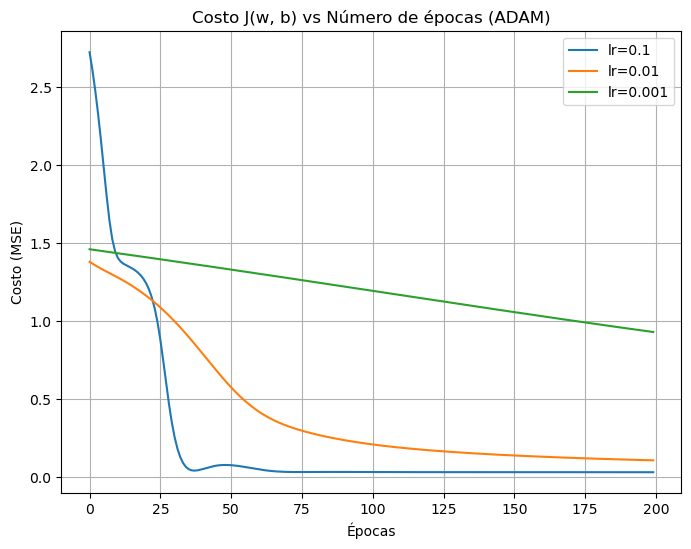

In [ ]:
# --------------------
# Generación de datos
# --------------------
data_x = np.linspace(-2, 2, data_set_size).reshape(-1, 1)  # vector aleatorio con 100 valores entre -2 y 2
np.random.seed(42)
# valores reales a estimar
true_w, true_b = 2.5, -1.0
ruido = 0.2 * np.random.randn(data_set_size, 1)
# Funcion y datos a aproximar
data_y =  funcion_no_lineal(true_w, data_x, true_b) + ruido

# Parámetros
beta1 = 0.9 # 𝛽1=0.9 Controla el promedio móvil del primer momento (la media de los gradientes)
beta2 = 0.999 #  β2=0.999: Controla el promedio móvil del segundo momento (la varianza de los gradientes)
epsilon = 1e-8 # ϵ=1e−8: Pequeño valor añadido para evitar la división por cero

# β1 controla la velocidad de adaptación del gradiente.
# 𝛽2 estabiliza el cálculo de la varianza.
# 𝜖 garantiza la estabilidad numérica.

# Referencias 
# 1. Algoritmo de Optimización del Gradiente Descendent: https://www.youtube.com/watch?v=iyMFcF36gO0&list=PLT81OVhq-1oEr9XIKszWvLXjzv4bb_5xj&index=44&ab_channel=OssabaTech
# 2. Gentle Introduction to the Adam Optimization Algorithm for Deep Learning https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

# Implementacion ADAM 
def gradiente_adam(plt, data_x, data_y, beta1, beta2, epsilon, learning_rates, graficar_historial = True):
    for learning_rate in learning_rates:
        w = np.random.randn()
        b = np.random.randn()
        cost_history = []
        # Inicialización de Adam
        m_w, v_w = 0, 0
        m_b, v_b = 0, 0
        # Inicialización de trayectoria
        trajectoria = [] # Se utiliza en grafica 3D en 1C)

        for t in range(1, epochs + 1):
            z = w * data_x + b
            y_hat = activacion(z)
            cost = compute_cost(y_hat, data_y)
            cost_history.append(cost)
            trajectoria.append((w, b, cost))
            
            # Cálculo de gradientes
            _, dw, db =  gradiente(y_hat, data_y, data_x, z)

            # Actualización de momentos
            m_w = beta1 * m_w + (1 - beta1) * dw
            v_w = beta2 * v_w + (1 - beta2) * (dw ** 2)

            m_b = beta1 * m_b + (1 - beta1) * db
            v_b = beta2 * v_b + (1 - beta2) * (db ** 2)

            # Corrección de sesgo
            m_w_corr = m_w / (1 - beta1 ** t)
            v_w_corr = v_w / (1 - beta2 ** t)

            m_b_corr = m_b / (1 - beta1 ** t)
            v_b_corr = v_b / (1 - beta2 ** t)

            # Actualización de parámetros
            w -= learning_rate * m_w_corr / (np.sqrt(v_w_corr) + epsilon)
            b -= learning_rate * m_b_corr / (np.sqrt(v_b_corr) + epsilon)

        # Visualización de la trayectoria de aprendizaje
        if graficar_historial:
            graficarHistorial(plt, cost_history, learning_rate, epochs)
    return (trajectoria, w, b)

# Configurar Grafico
configurarGrafico(plt)

# Ejecutar GD con optimizacion ADAM
gradiente_adam(plt, data_x, data_y, beta1, beta2, epsilon, learning_rates)

mostrarGrafico(plt, "ADAM")




## 1c) Visualización en 3D de la trayectoria de aprendizaje (0.5 puntos)

In [375]:
def graficarAprendizajeEnSuperficieDeCosto(data_x, data_y, trayectoria_gd, trayectoria_adam):
    # Graficar la superficie de costo
    w_vals = np.linspace(-3, 3, 100)
    b_vals = np.linspace(-3, 3, 100)
    W, B = np.meshgrid(w_vals, b_vals)

    cost_surface = np.array([[compute_cost(activacion(W[i, j] * data_x + B[i, j]), data_y)
                            for j in range(B.shape[1])]
                            for i in range(W.shape[0])])

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(W, B, cost_surface, alpha=0.3, cmap='viridis')

    # Añadir trayectorias
    trayectoria_gd = np.array(trayectoria_gd)
    trayectoria_adam = np.array(trayectoria_adam)
    ax.plot(trayectoria_gd[:, 0], trayectoria_gd[:, 1], trayectoria_gd[:, 2], marker='o', color='red', label='GD')
    ax.plot(trayectoria_adam[:, 0], trayectoria_adam[:, 1], trayectoria_adam[:, 2], marker='o', color='blue', label='Adam')

    ax.set_xlabel("w")
    ax.set_ylabel("b")
    ax.set_zlabel("Costo")
    plt.legend()
    plt.title("Trayectoria de Aprendizaje en la Superficie de Costo")
    plt.show()


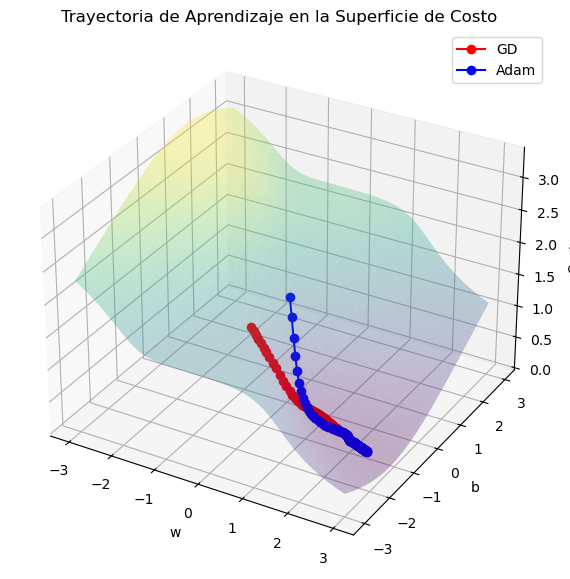

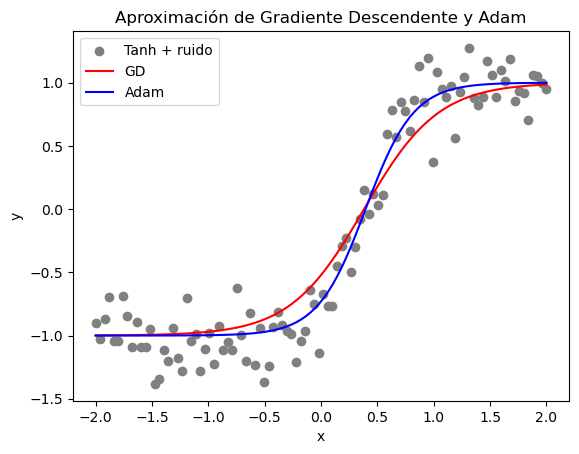

In [380]:
# Generación de datos
data_x = np.linspace(-2, 2, 100).reshape(-1, 1)
np.random.seed(42)
true_w, true_b = 2.5, -1.0
noise = 0.2 * np.random.randn(100, 1)
data_y = np.tanh(true_w * data_x + true_b) + noise


# Parámetros
n_epochs = 100
learning_rate = 0.1

# ---------------------
# Gradiente Descendente
# ---------------------
w_gd = np.random.randn()
b_gd = np.random.randn()

trayectoria_gd, w_gd, b_gd = gradienteDescendiente(plt, data_x, data_y, epochs, [learning_rate], graficar_historial=False)


# ---------------------
# ADAM
# ---------------------

# Parámetros
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

trayectoria_adam, w_adam, b_adam = gradiente_adam(plt, data_x, data_y, beta1, beta2, epsilon, [learning_rate], graficar_historial=False)

# Graficar en 3D la trayectoria del aprendizaje de ambos optimizadores sobre la superficie de la función de costo  𝐽(𝑤,𝑏)
graficarAprendizajeEnSuperficieDeCosto(data_x, data_y, trayectoria_gd, trayectoria_adam)


def graficarAprendizajeVsFuncionReal(data_x, data_y, w_gd, b_gd, w_adam, b_adam):
    # Graficar el aprendizaje vs la función real
    plt.scatter(data_x, data_y, color='gray', label='Tanh + ruido')
    plt.plot(data_x, activacion(w_gd * data_x + b_gd), color='red', label='GD')
    plt.plot(data_x, activacion(w_adam * data_x + b_adam), color='blue', label='Adam')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.title("Aproximación de Gradiente Descendente y Adam")
    plt.show()

graficarAprendizajeVsFuncionReal(data_x, data_y, w_gd, b_gd, w_adam, b_adam)


Neura 

---------------------

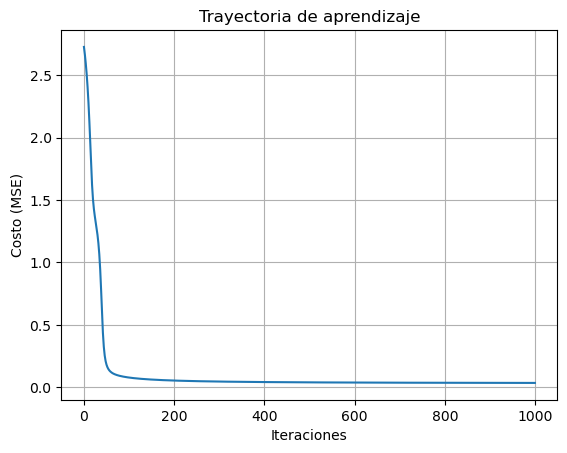

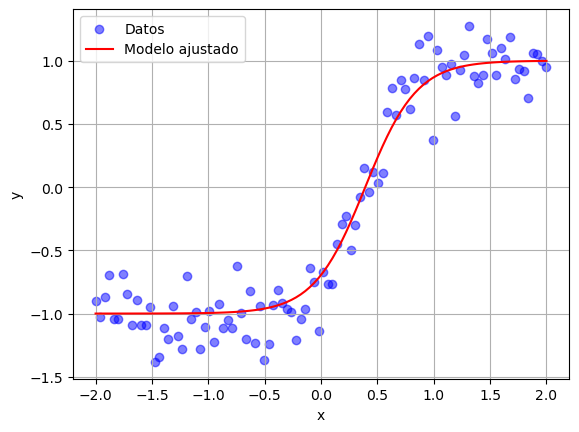

In [378]:
import numpy as np
import matplotlib.pyplot as plt

class SingleNeuron:
    def __init__(self, learning_rate=0.1, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.w = np.random.randn()
        self.b = np.random.randn()

    def activation(self, z):
        return np.tanh(z)

    def compute_cost(self, y_hat, y):
        return np.mean((y_hat - y) ** 2)

    def fit(self, X, y):
        cost_history = []
        m = len(X)

        for _ in range(self.n_iterations):
            z = self.w * X + self.b
            y_hat = self.activation(z)
            cost = self.compute_cost(y_hat, y)
            cost_history.append(cost)

            dz = (y_hat - y) * (1 - np.tanh(z)**2)
            dw = np.mean(dz * X)
            db = np.mean(dz)

            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

        return cost_history

    def predict(self, X):
        return self.activation(self.w * X + self.b)


# Generación de datos
data_x = np.linspace(-2, 2, 100).reshape(-1, 1)
np.random.seed(42)
true_w, true_b = 2.5, -1.0
noise = 0.2 * np.random.randn(100, 1)
data_y = np.tanh(true_w * data_x + true_b) + noise

# Entrenamiento del modelo
neuron = SingleNeuron(learning_rate=0.1, n_iterations=1000)
cost_history = neuron.fit(data_x, data_y)

# Visualización de la trayectoria de aprendizaje
plt.plot(cost_history)
plt.title("Trayectoria de aprendizaje")
plt.xlabel("Iteraciones")
plt.ylabel("Costo (MSE)")
plt.grid(True)
plt.show()

# Visualización del ajuste final
plt.scatter(data_x, data_y, color='blue', alpha=0.5, label='Datos')
plt.plot(data_x, neuron.predict(data_x), color='red', label='Modelo ajustado')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
